In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [102]:
df=pd.read_csv('census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [103]:
df.shape

(32560, 15)

We have 32560 rows and 15 columns.

In [104]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

Here, we have int data types in age, fnlwgt, education_num, capital_gain, capital_loss and hours_per_week columns where as object data types are present in workclass, education, marital_status, occupation, relationship, race, sex, native_country and income columns.  

# To check missing values

In [105]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Here, we have no missing values.

<AxesSubplot:>

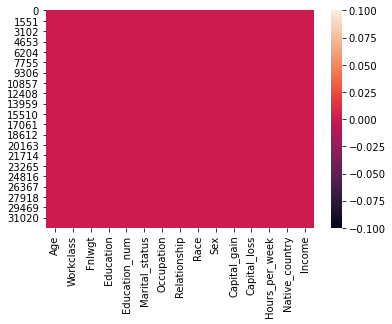

In [106]:
sns.heatmap(df.isnull())

# Summary Statistics

In [107]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


1. The mean is higher than median in all the columns.

# To check correlation

In [108]:
dfcorr=df.corr()
dfcorr

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


<AxesSubplot:>

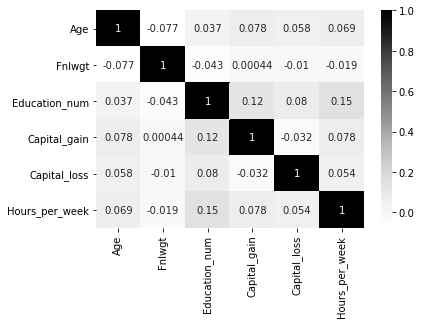

In [109]:
sns.heatmap(dfcorr,cmap='Greys',annot=True)

# EDA

<AxesSubplot:xlabel='Income', ylabel='count'>

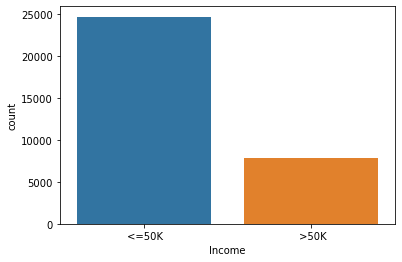

In [110]:
sns.countplot(df['Income'])

Here, the class is imbalanced. I will balance the class after doing the EDA

In [111]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

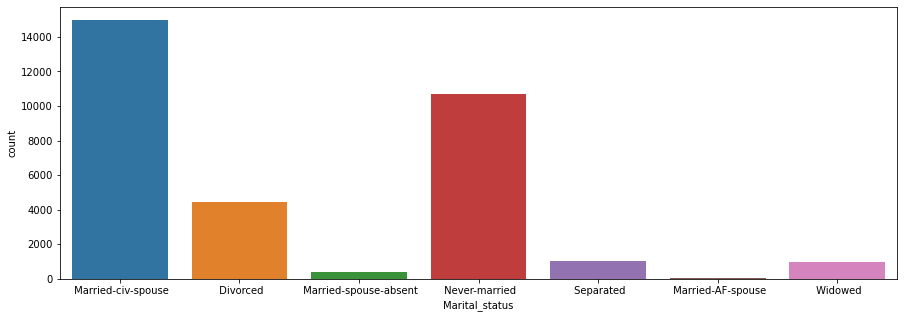

In [112]:
plt.figure(figsize=(15,5))
sns.countplot(df['Marital_status'])

From the above observations, wecan say that married-civ-spouse are 14976, never-married are 10682,divorced are 4443, separated are 1025, widowed are 993, married-spouse-absent are 418 and married-af-spouse are 23.

<AxesSubplot:xlabel='Relationship', ylabel='count'>

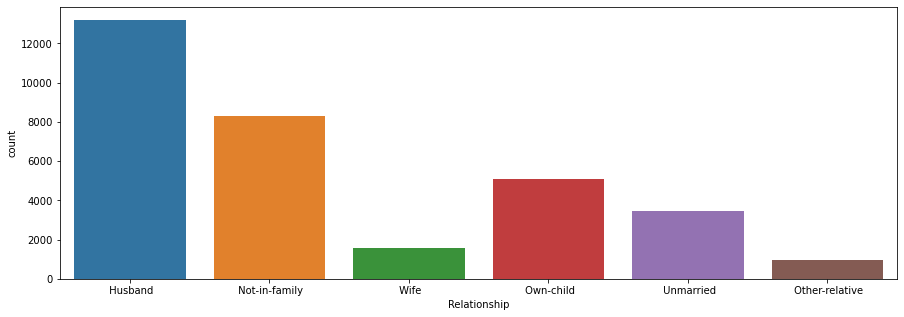

In [113]:
plt.figure(figsize=(15,5))
sns.countplot(df['Relationship'])

From the above observations, we can say that husband are 13193, not-in-family are 8304, own-child are 5068, unmarried are 3446, wife are 1568 and other-relative are 981.

<AxesSubplot:xlabel='Race', ylabel='count'>

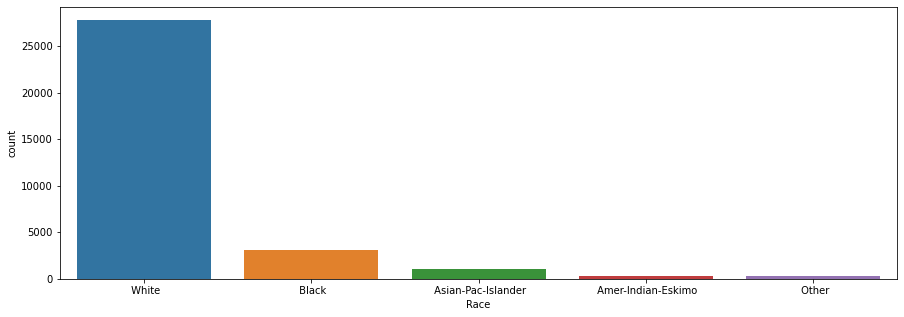

In [114]:
plt.figure(figsize=(15,5))
sns.countplot(df['Race'])

From the above observations, we can say that in race section, white are 27815, black are 3124, asian-pac-islander are 1039, amer-indian-eskimo are 311 and other are 271.

<AxesSubplot:xlabel='Sex', ylabel='count'>

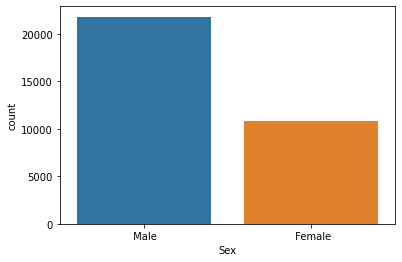

In [115]:
sns.countplot(df['Sex'])

from the above observations, we can say that male are 21789 and female are 10771.

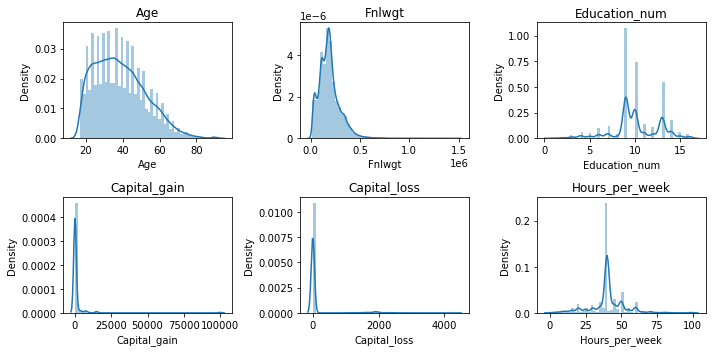

In [116]:
k=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']
j=1
plt.figure(figsize=(10,5))
for i in k:
    plt.subplot(2,3,j)
    sns.distplot(df[i])
    plt.title(i)
    j=j+1
plt.tight_layout()    

The datas are distributed normally in all the columns except in capital_gain and capital_loss columns.

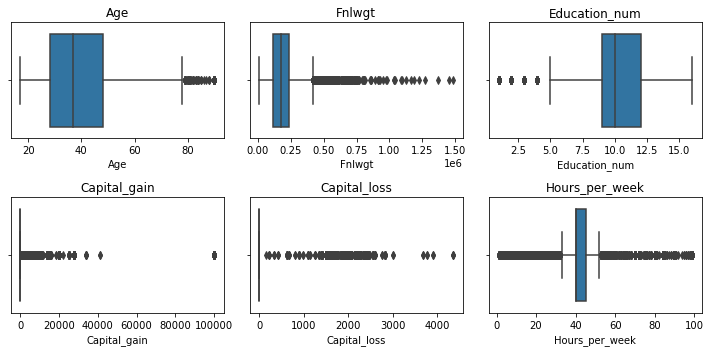

In [117]:
k=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']
j=1
plt.figure(figsize=(10,5))
for i in k:
    plt.subplot(2,3,j)
    sns.boxplot(df[i])
    plt.title(i)
    j=j+1
plt.tight_layout() 

There are outliers present in all the columns.

In [118]:
y=df[['Income']]

In [119]:
df.drop('Income',axis=1,inplace=True)

In [120]:
df.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

There is some skewness present in some of the columns. Lets remove it by applying some transforms.

In [121]:
df_new=df.copy(deep=True)

<AxesSubplot:xlabel='Age', ylabel='Density'>

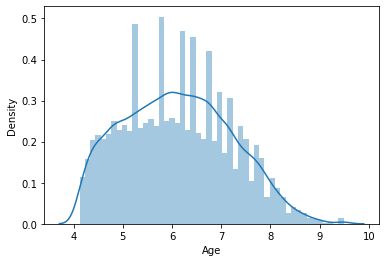

In [122]:
df_new['Age']=np.sqrt(df_new['Age'])
sns.distplot(df_new['Age'])

The skewness has been removed in this column after applying sqrt transform.

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

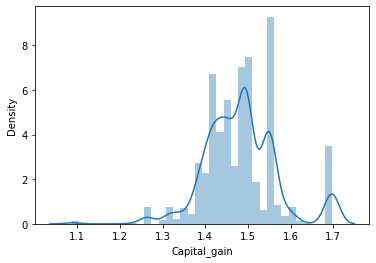

In [129]:
df_new['Capital_gain']=np.sqrt(df_new['Capital_gain'])
sns.distplot(df_new['Capital_gain'])

The skewness has been removed in this column after applying sqrt transform.

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

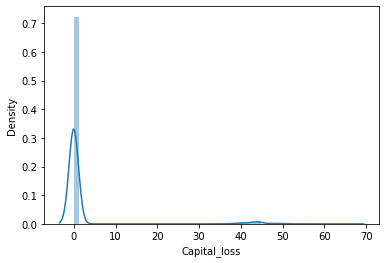

In [124]:
df_new['Capital_loss']=np.sqrt(df_new['Capital_loss'])
sns.distplot(df_new['Capital_loss'])

The skewness has not been removed in this column after applying sqrt transform.

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

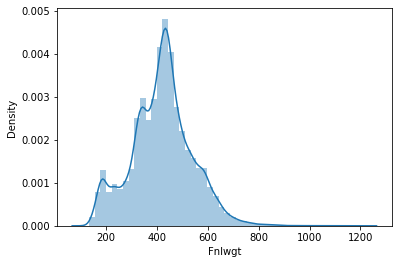

In [125]:
df_new['Fnlwgt']=np.sqrt(df_new['Fnlwgt'])
sns.distplot(df_new['Fnlwgt'])

The skewness has been removed in this column after applying sqrt transform.

In [130]:
df_new.skew()

Age               0.204335
Fnlwgt            0.189066
Education_num    -0.311630
Capital_gain      0.260185
Capital_loss      4.376279
Hours_per_week    0.227636
dtype: float64

Here, the skewness has been removed after applying the transforms except in capital_loss column where it is not coming in the range of -0.5 to +0.5.

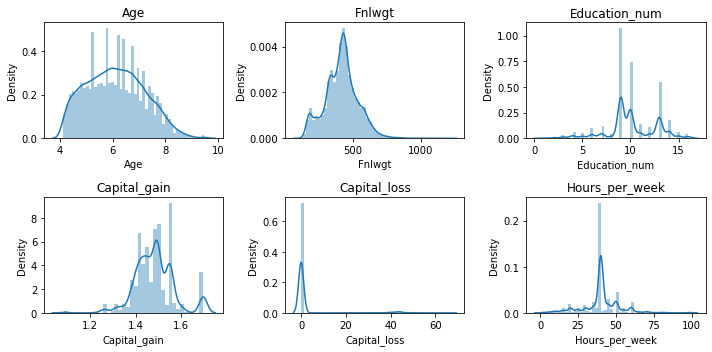

In [131]:
k=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']
j=1
plt.figure(figsize=(10,5))
for i in k:
    plt.subplot(2,3,j)
    sns.distplot(df_new[i])
    plt.title(i)
    j=j+1
plt.tight_layout()  

The datas are distributed normally in all the columns except in capital_loss column.

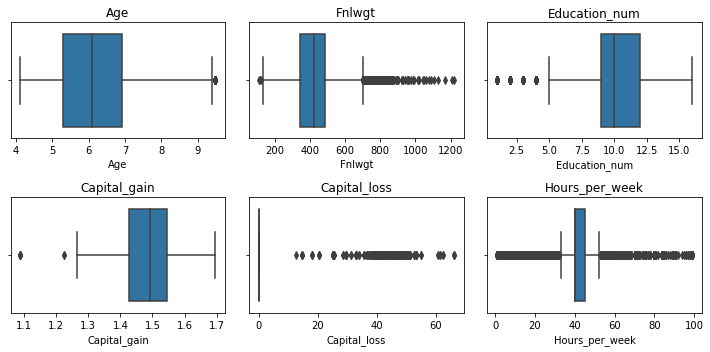

In [132]:
k=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']
j=1
plt.figure(figsize=(10,5))
for i in k:
    plt.subplot(2,3,j)
    sns.boxplot(df_new[i])
    plt.title(i)
    j=j+1
plt.tight_layout()  

There are some outliers present in all the columns.

In [25]:
df_new

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,7.071068,Self-emp-not-inc,288.636450,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,13,United-States
1,6.164414,Private,464.377002,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,40,United-States
2,7.280110,Private,484.480134,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,40,United-States
3,5.291503,Private,581.729318,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,40,Cuba
4,6.082763,Private,533.462276,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.000000,0.0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,5.196152,Private,507.249446,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0.000000,0.0,38,United-States
32556,6.324555,Private,392.904569,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.000000,0.0,40,United-States
32557,7.615773,Private,389.756334,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0.000000,0.0,40,United-States
32558,4.690416,Private,448.876375,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0.000000,0.0,20,United-States


In [26]:
df_new['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [27]:
df_new['Education_num'].value_counts()

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64

The columns Education as we can see that is just a string representation of the Education_num column.

Fnlwgt is not having any pattern with the target variable income and it will be dropped before we build the model.

In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_new['Workclass']=le.fit_transform(df_new['Workclass'])
df_new['Marital_status']=le.fit_transform(df_new['Marital_status'])
df_new['Occupation']=le.fit_transform(df_new['Occupation'])
df_new['Relationship']=le.fit_transform(df_new['Relationship'])
df_new['Race']=le.fit_transform(df_new['Race'])
df_new['Sex']=le.fit_transform(df_new['Sex'])
df_new['Native_country']=le.fit_transform(df_new['Native_country'])

In [29]:
df_new

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,7.071068,6,288.636450,Bachelors,13,2,4,0,4,1,0.000000,0.0,13,39
1,6.164414,4,464.377002,HS-grad,9,0,6,1,4,1,0.000000,0.0,40,39
2,7.280110,4,484.480134,11th,7,2,6,0,2,1,0.000000,0.0,40,39
3,5.291503,4,581.729318,Bachelors,13,2,10,5,2,0,0.000000,0.0,40,5
4,6.082763,4,533.462276,Masters,14,2,4,5,4,0,0.000000,0.0,40,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,5.196152,4,507.249446,Assoc-acdm,12,2,13,5,4,0,0.000000,0.0,38,39
32556,6.324555,4,392.904569,HS-grad,9,2,7,0,4,1,0.000000,0.0,40,39
32557,7.615773,4,389.756334,HS-grad,9,6,1,4,4,0,0.000000,0.0,40,39
32558,4.690416,4,448.876375,HS-grad,9,4,1,3,4,1,0.000000,0.0,20,39


In [30]:
df_new.drop(['Fnlwgt','Education'],axis=1,inplace=True)

In [31]:
df_new

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,7.071068,6,13,2,4,0,4,1,0.000000,0.0,13,39
1,6.164414,4,9,0,6,1,4,1,0.000000,0.0,40,39
2,7.280110,4,7,2,6,0,2,1,0.000000,0.0,40,39
3,5.291503,4,13,2,10,5,2,0,0.000000,0.0,40,5
4,6.082763,4,14,2,4,5,4,0,0.000000,0.0,40,39
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,5.196152,4,12,2,13,5,4,0,0.000000,0.0,38,39
32556,6.324555,4,9,2,7,0,4,1,0.000000,0.0,40,39
32557,7.615773,4,9,6,1,4,4,0,0.000000,0.0,40,39
32558,4.690416,4,9,4,1,3,4,1,0.000000,0.0,20,39


In [32]:
df_new['Income']=y['Income']
df_new

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,7.071068,6,13,2,4,0,4,1,0.000000,0.0,13,39,<=50K
1,6.164414,4,9,0,6,1,4,1,0.000000,0.0,40,39,<=50K
2,7.280110,4,7,2,6,0,2,1,0.000000,0.0,40,39,<=50K
3,5.291503,4,13,2,10,5,2,0,0.000000,0.0,40,5,<=50K
4,6.082763,4,14,2,4,5,4,0,0.000000,0.0,40,39,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,5.196152,4,12,2,13,5,4,0,0.000000,0.0,38,39,<=50K
32556,6.324555,4,9,2,7,0,4,1,0.000000,0.0,40,39,>50K
32557,7.615773,4,9,6,1,4,4,0,0.000000,0.0,40,39,<=50K
32558,4.690416,4,9,4,1,3,4,1,0.000000,0.0,20,39,<=50K


In [33]:
df_new['Income']=le.fit_transform(df_new['Income'])
df_new

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,7.071068,6,13,2,4,0,4,1,0.000000,0.0,13,39,0
1,6.164414,4,9,0,6,1,4,1,0.000000,0.0,40,39,0
2,7.280110,4,7,2,6,0,2,1,0.000000,0.0,40,39,0
3,5.291503,4,13,2,10,5,2,0,0.000000,0.0,40,5,0
4,6.082763,4,14,2,4,5,4,0,0.000000,0.0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,5.196152,4,12,2,13,5,4,0,0.000000,0.0,38,39,0
32556,6.324555,4,9,2,7,0,4,1,0.000000,0.0,40,39,1
32557,7.615773,4,9,6,1,4,4,0,0.000000,0.0,40,39,0
32558,4.690416,4,9,4,1,3,4,1,0.000000,0.0,20,39,0


In [34]:
from sklearn.utils import resample

In [35]:
train_positive=df_new[df_new['Income']==1]
train_negative=df_new[df_new['Income']==0]

# Upsample minority class
train_positive_upsample=resample(train_positive,replace=True,n_samples=24719,random_state=18)

# Combine majority class with upsampled minority class
df1=pd.concat([train_negative,train_positive_upsample])

# Display new class counts
df1['Income'].value_counts()

1    24719
0    24719
Name: Income, dtype: int64

Here, the class has been balanced.

<AxesSubplot:xlabel='Income', ylabel='count'>

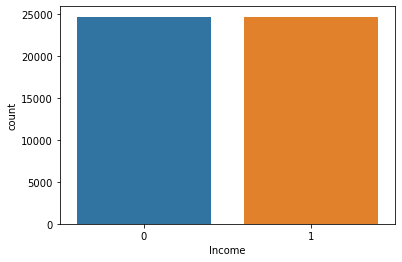

In [36]:
sns.countplot(df1['Income'])

In [37]:
df1

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,7.071068,6,13,2,4,0,4,1,0.0,0.0,13,39,0
1,6.164414,4,9,0,6,1,4,1,0.0,0.0,40,39,0
2,7.280110,4,7,2,6,0,2,1,0.0,0.0,40,39,0
3,5.291503,4,13,2,10,5,2,0,0.0,0.0,40,5,0
4,6.082763,4,14,2,4,5,4,0,0.0,0.0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29056,5.744563,4,14,2,10,0,4,1,0.0,0.0,45,39,1
10636,6.708204,4,13,2,4,0,4,1,0.0,0.0,40,39,1
15486,7.000000,4,13,2,10,0,4,1,0.0,0.0,40,39,1
31798,7.211103,6,15,2,10,0,4,1,0.0,0.0,70,39,1


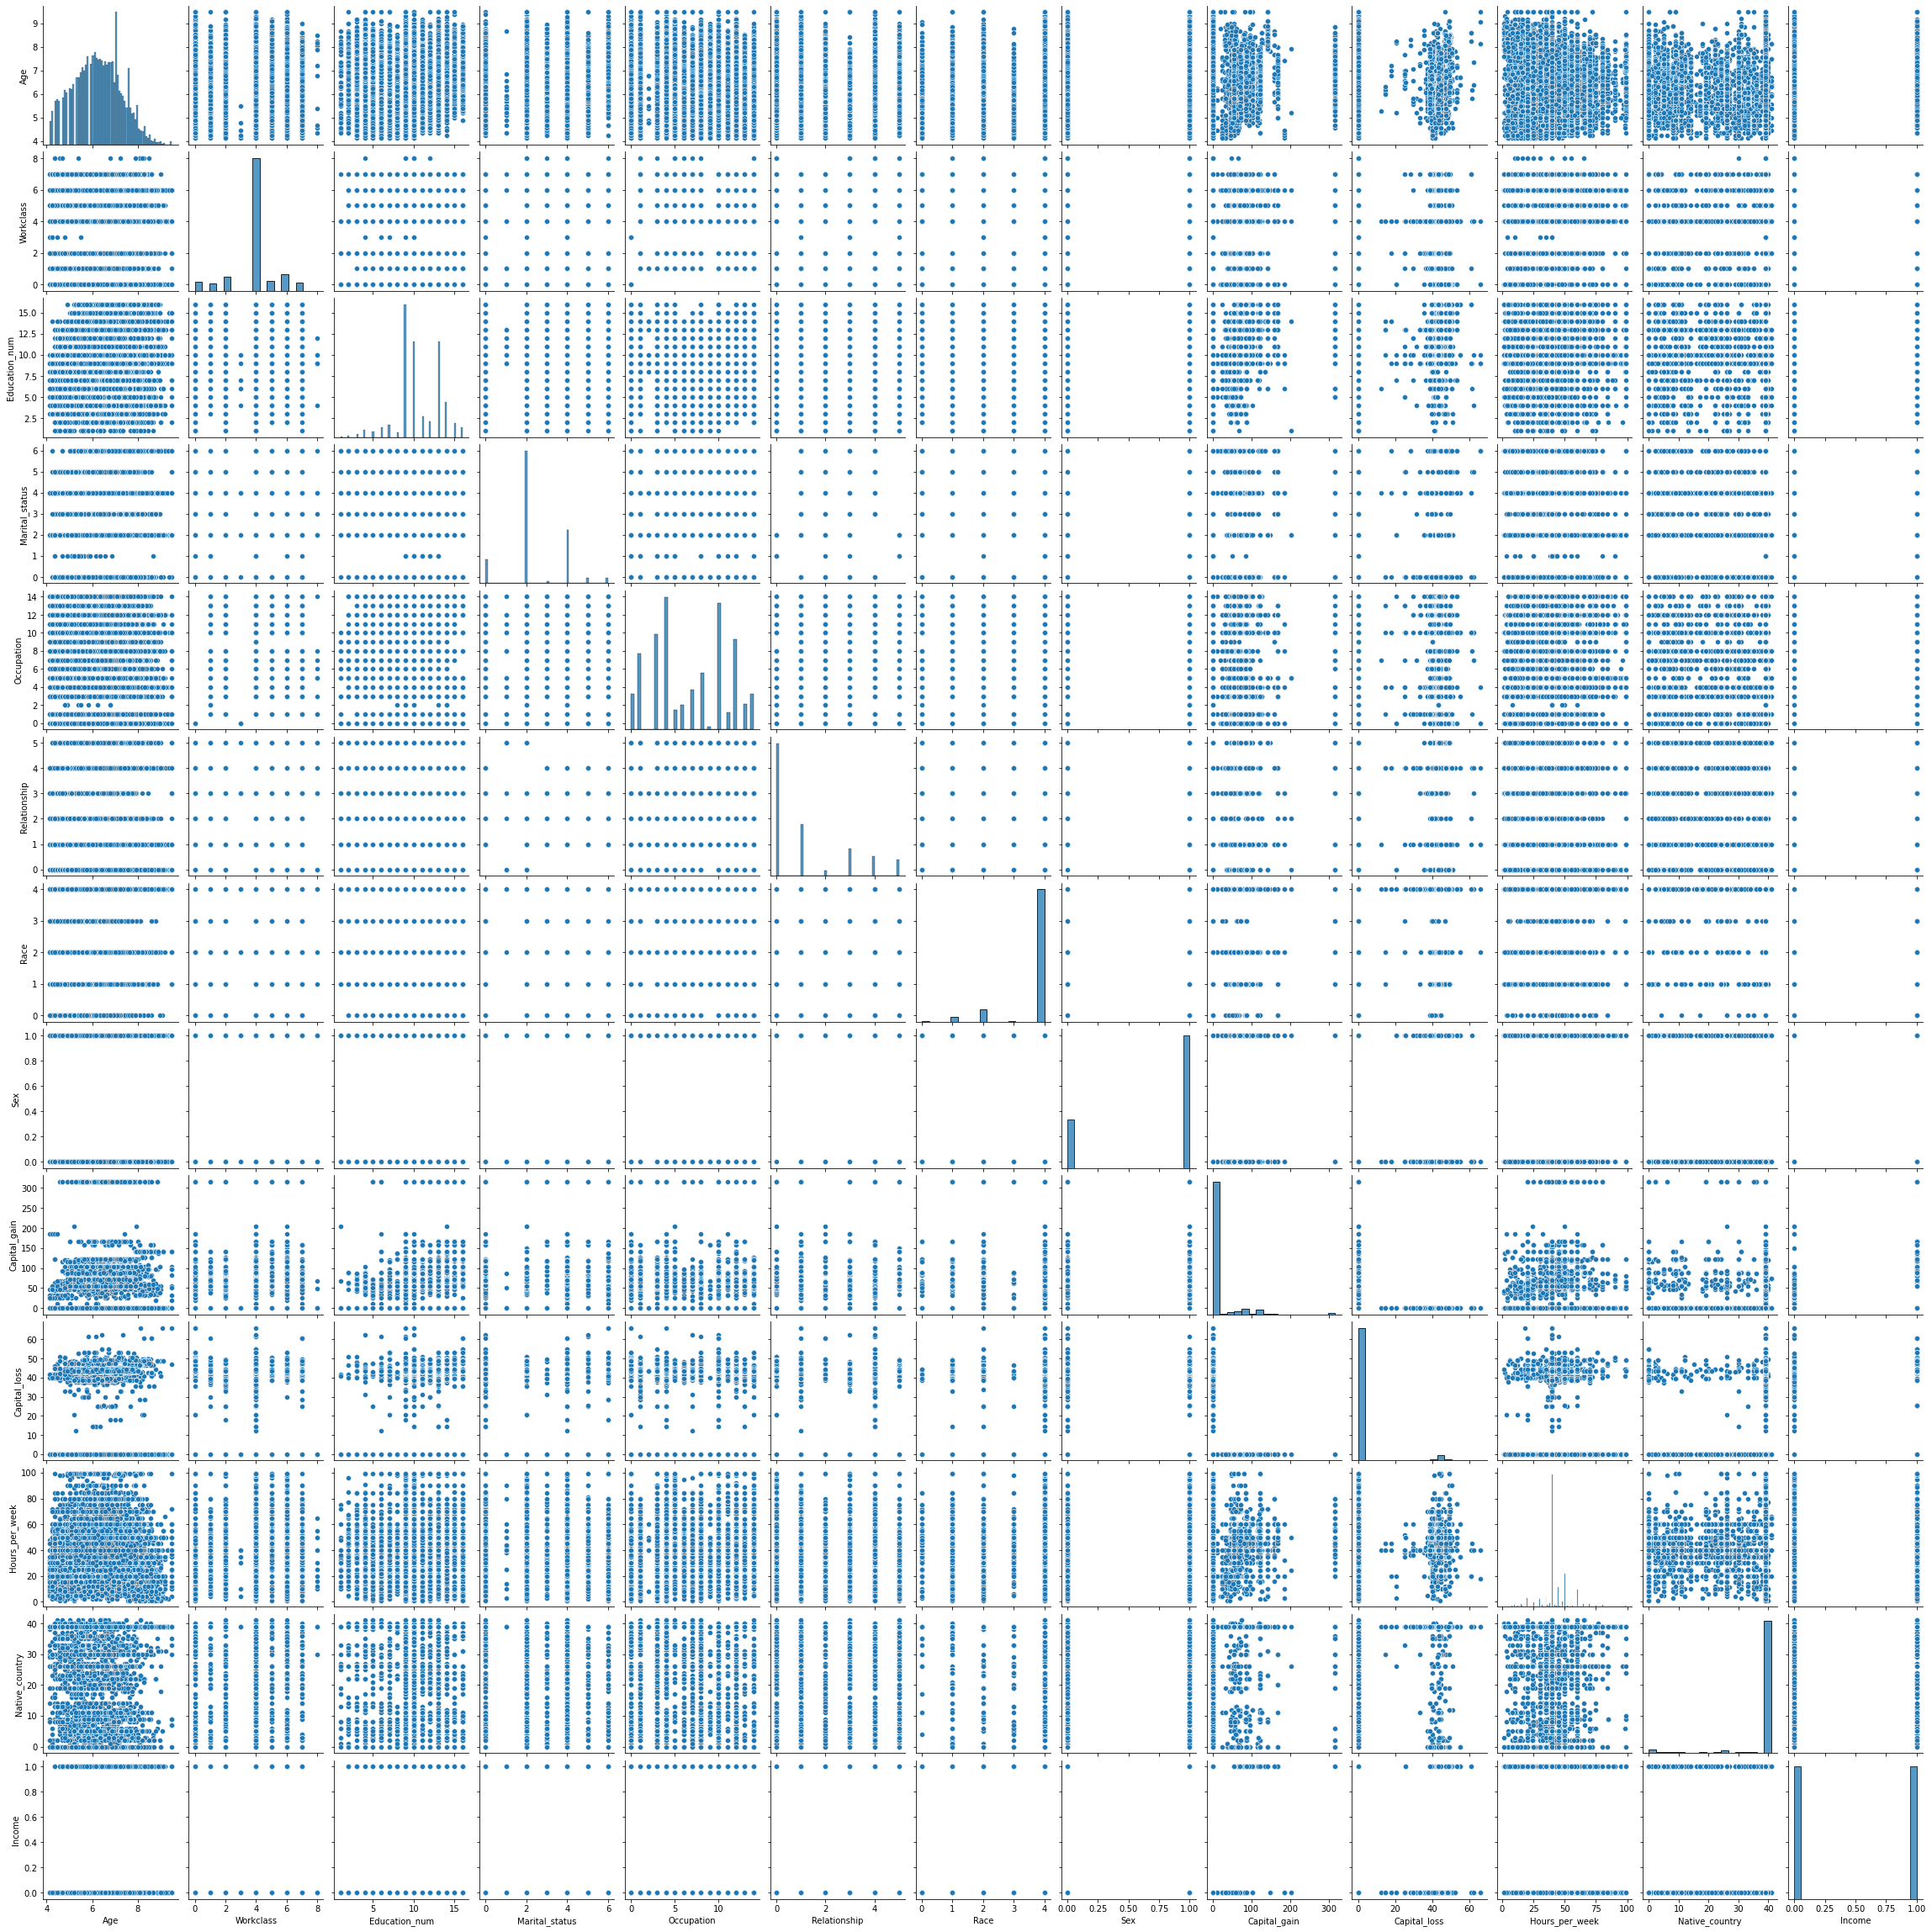

In [87]:
sns.pairplot(df1)

Here, we can say that all the plots are present by using the pairplot.

<AxesSubplot:xlabel='Age', ylabel='Count'>

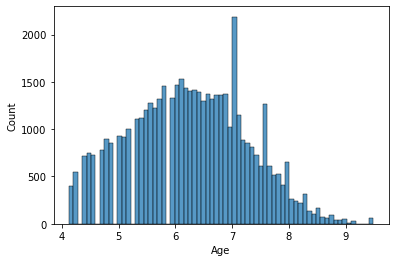

In [88]:
sns.histplot(df1['Age'])

The plots are distributed normally in this column without any skewness.

<AxesSubplot:xlabel='Occupation', ylabel='Count'>

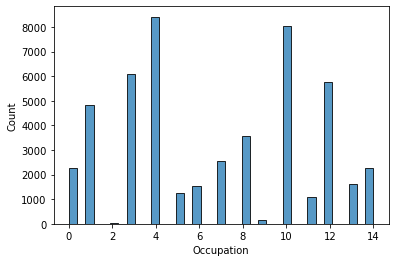

In [89]:
sns.histplot(df1['Occupation'])

The plots are distributed normally in this column without any skewness.

In [38]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

array([[0.77322797, 1.4420029 , 0.91694229, ..., 2.41410456, 0.28309742,
        1.        ],
       [0.11544372, 0.05894461, 0.61235434, ..., 0.17585075, 0.28309742,
        1.        ],
       [0.97812401, 0.05894461, 1.37700265, ..., 0.17585075, 0.28309742,
        1.        ],
       ...,
       [0.70356968, 0.05894461, 0.91694229, ..., 0.17585075, 0.28309742,
        1.        ],
       [0.91048533, 1.4420029 , 1.6815906 , ..., 2.31109793, 0.28309742,
        1.        ],
       [0.11544372, 2.13353205, 0.91694229, ..., 0.2386407 , 0.28309742,
        1.        ]])

In [39]:
print(np.where(z>3))

(array([    3,     8,    14, ..., 49425, 49431, 49432], dtype=int64), array([11,  6,  9, ..., 11,  9,  9], dtype=int64))


In [40]:
df2=df1[(z<3).all(axis=1)]
df2

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,7.071068,6,13,2,4,0,4,1,0.0,0.0,13,39,0
1,6.164414,4,9,0,6,1,4,1,0.0,0.0,40,39,0
2,7.280110,4,7,2,6,0,2,1,0.0,0.0,40,39,0
4,6.082763,4,14,2,4,5,4,0,0.0,0.0,40,39,0
5,7.000000,4,5,3,8,1,2,0,0.0,0.0,16,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29056,5.744563,4,14,2,10,0,4,1,0.0,0.0,45,39,1
10636,6.708204,4,13,2,4,0,4,1,0.0,0.0,40,39,1
15486,7.000000,4,13,2,10,0,4,1,0.0,0.0,40,39,1
31798,7.211103,6,15,2,10,0,4,1,0.0,0.0,70,39,1


In [41]:
((49438-41076)/49438)*100

16.914114648650834

In [42]:
df1.shape

(49438, 13)

In [43]:
df2.shape

(41076, 13)

Here, 8362 rows have been removed since there are outliers present in it.

In [47]:
x=df2.iloc[:,0:-1]
y=df2.iloc[:,-1]

In [48]:
x

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,7.071068,6,13,2,4,0,4,1,0.0,0.0,13,39
1,6.164414,4,9,0,6,1,4,1,0.0,0.0,40,39
2,7.280110,4,7,2,6,0,2,1,0.0,0.0,40,39
4,6.082763,4,14,2,4,5,4,0,0.0,0.0,40,39
5,7.000000,4,5,3,8,1,2,0,0.0,0.0,16,23
...,...,...,...,...,...,...,...,...,...,...,...,...
29056,5.744563,4,14,2,10,0,4,1,0.0,0.0,45,39
10636,6.708204,4,13,2,4,0,4,1,0.0,0.0,40,39
15486,7.000000,4,13,2,10,0,4,1,0.0,0.0,40,39
31798,7.211103,6,15,2,10,0,4,1,0.0,0.0,70,39


In [49]:
y

0        0
1        0
2        0
4        0
5        0
        ..
29056    1
10636    1
15486    1
31798    1
21306    1
Name: Income, Length: 41076, dtype: int32

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [51]:
maxAcc=0
MaxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc,
        maxRS=i
print('Best accuracy is',maxAcc,'on random state',maxRS)  

Best accuracy is (0.7576888744623874,) on random state 52


In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=52)

In [53]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(28753, 12)
(12323, 12)
(28753,)
(12323,)


In [56]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.7576888744623874
[[4964 1504]
 [1482 4373]]
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      6468
           1       0.74      0.75      0.75      5855

    accuracy                           0.76     12323
   macro avg       0.76      0.76      0.76     12323
weighted avg       0.76      0.76      0.76     12323



In [57]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.7606102410127404
[[4536 1932]
 [1018 4837]]
              precision    recall  f1-score   support

           0       0.82      0.70      0.75      6468
           1       0.71      0.83      0.77      5855

    accuracy                           0.76     12323
   macro avg       0.77      0.76      0.76     12323
weighted avg       0.77      0.76      0.76     12323



In [58]:
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.7765966079688388
[[5032 1436]
 [1317 4538]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.79      6468
           1       0.76      0.78      0.77      5855

    accuracy                           0.78     12323
   macro avg       0.78      0.78      0.78     12323
weighted avg       0.78      0.78      0.78     12323



In [59]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8855798101111743
[[5443 1025]
 [ 385 5470]]
              precision    recall  f1-score   support

           0       0.93      0.84      0.89      6468
           1       0.84      0.93      0.89      5855

    accuracy                           0.89     12323
   macro avg       0.89      0.89      0.89     12323
weighted avg       0.89      0.89      0.89     12323



In [63]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8510103059319971
[[5099 1369]
 [ 467 5388]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      6468
           1       0.80      0.92      0.85      5855

    accuracy                           0.85     12323
   macro avg       0.86      0.85      0.85     12323
weighted avg       0.86      0.85      0.85     12323



In [65]:
rf=RandomForestClassifier(n_estimators=150)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.9063539722470177
[[5594  874]
 [ 280 5575]]
              precision    recall  f1-score   support

           0       0.95      0.86      0.91      6468
           1       0.86      0.95      0.91      5855

    accuracy                           0.91     12323
   macro avg       0.91      0.91      0.91     12323
weighted avg       0.91      0.91      0.91     12323



These accuracy scores can be because of overfitting. Lets check with cross validation.

# Cross Validation

In [67]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lg,x,y,cv=5)
print(score)
print(score.mean())

[0.75073028 0.74765673 0.75496044 0.74911747 0.75252587]
0.7509981562925776


In [68]:
score=cross_val_score(gnb,x,y,cv=5)
print(score)
print(score.mean())

[0.76716164 0.76421181 0.75861229 0.75934267 0.75325624]
0.7605169285055183


In [69]:
score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())

[0.89909932 0.89214851 0.89555691 0.90237371 0.89908704]
0.897653095573502


In [70]:
score=cross_val_score(svc,x,y,cv=5)
print(score)
print(score.mean())

[0.77117819 0.77212416 0.76859404 0.77638466 0.77650639]
0.7729574880538308


In [71]:
score=cross_val_score(knn,x,y,cv=5)
print(score)
print(score.mean())

[0.8555258  0.85477785 0.85112599 0.85684723 0.85039562]
0.8537344972415506


In [72]:
score=cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())

[0.91893866 0.9100426  0.90931223 0.91758977 0.91186853]
0.9135503605926651


The least difference between the highest accuracy score and cv score says that random forest model is working better.

# Hyper Parameter Tuning

We use this technique to improve the accuracy of the best model that we have choosen.

In [74]:
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[90,100,110],
            'criterion':['gini','entropy'],
            'max_depth':range(2,10,2),
            'min_samples_split':range(2,20,2),
            'max_features':['auto','sqrt','log2']}
gs=GridSearchCV(RandomForestClassifier(),parameters,cv=5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10, 2),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': range(2, 20, 2),
                         'n_estimators': [90, 100, 110]})

In [75]:
print(gs.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'min_samples_split': 6, 'n_estimators': 100}


In [85]:
RFmodel=RandomForestClassifier(criterion='gini',max_features='log2',n_estimators=100,min_samples_split=6)
RFmodel.fit(x_train,y_train)
pred=RFmodel.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

89.84013633043901


# Saving the model

In [86]:
import joblib
joblib.dump(RFmodel,'RFmodel.obj')

['RFmodel.obj']